# Zomato Data Analysis

### Step 1 - Importing liberaries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


### Step 2 - Create dataframe

In [42]:
df = pd.read_csv("Zomato data .csv")

In [43]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Step 3 - Data preprocessing

In [44]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [45]:
df.shape

(148, 7)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [47]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [48]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

#### Converting rating datatype

In [49]:
def rating(value):
    values = value.split('/')
    return float(values[0])

df['rate'] = df['rate'].apply(rating)

In [50]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#### Analysis

Text(0.5, 0, 'type of resturent')

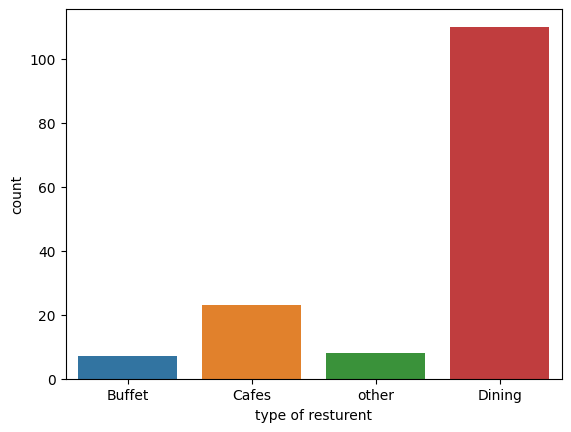

In [51]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of resturent')

#### Conclusion - majority of resturent falls in dining category

Text(0, 0.5, 'votes')

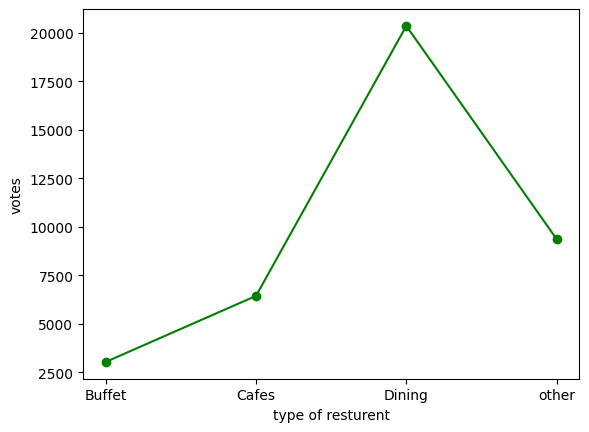

In [52]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker='o')
plt.xlabel("type of resturent")
plt.ylabel('votes')


#### Conclusion - Dining resturent has receive maximum vote

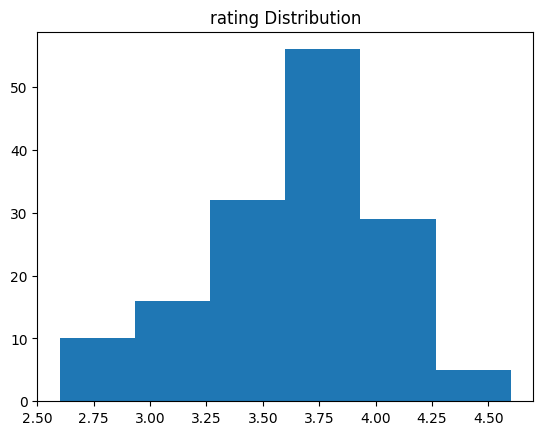

In [53]:
plt.hist(df['rate'], bins=6)
plt.title('rating Distribution')
plt.show()

#### Conclusion - Majority of resturent are getting 3.5 to 4 rating 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

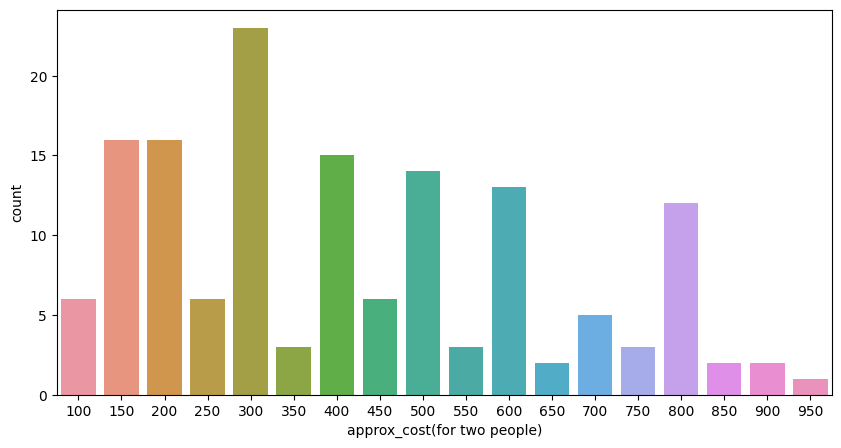

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['approx_cost(for two people)'])

#### Conclusion - Approx 300 rupees spent by majority of couples

#### Which mode has recieve maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

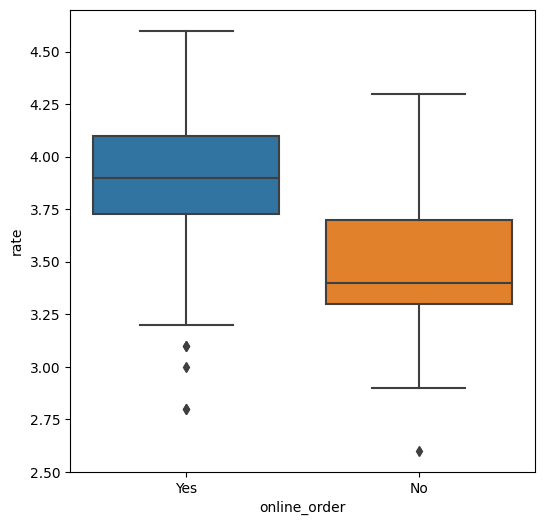

In [55]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)

#### Conclusion - Offline order receive lower rating as compare to online order

In [56]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


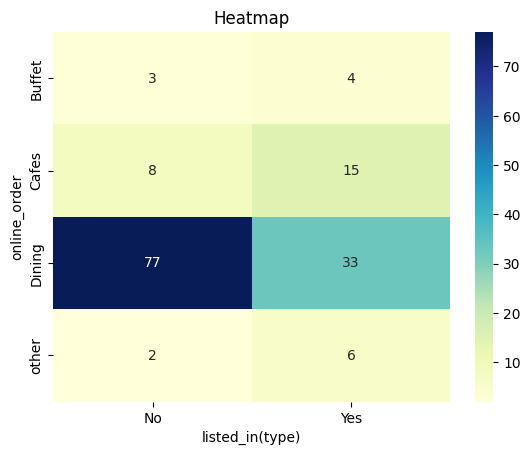

In [57]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap')
plt.xlabel('listed_in(type)')
plt.ylabel('online_order')
plt.show()

#### Conclusion - Dining resturent primeraly accept ofline orders whereas cafes primeraly accept online orders